# Malignant-Comments-Classifier Project
#### Problem Statement
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

#### Data Set Description
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.
The data set includes:

- Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
- Highly Malignant: It denotes comments that are highly malignant and hurtful.
- Rude: It denotes comments that are very rude and offensive.
- Threat: It contains indication of the comments that are giving any threat to someonone.
- Abuse: It is for comments that are abusive in nature.
- Loathe: It describes the comments which are hateful and loathing in nature.
- ID: It includes unique Ids associated with each comment text given.
- Comment text: This column contains the comments extracted from various social media platforms.

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. You need to build a model that can differentiate between comments and its categories.

In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud

In [2]:
train_url="C:\Users\JOHN TOJO\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv"
test_url="C:\Users\JOHN TOJO\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv"

In [3]:
# importing train dataset
df_train=pd.read_csv(train_url)
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
# importing test dataset
df_test=pd.read_csv(test_url)
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [5]:
df=df_train

In [6]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#### check for nulls

In [7]:
df.isna().sum().sum()

0

#### check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### counting to see the number of positive and negative comments 

In [10]:
col=['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
pos=[]
neg=[]
for i in col:
    print(i)
    pos_mp=np.where(df[i]==0)
    print('positve comments',len(pos_mp[0]))
    pos.append(len(pos_mp[0]))
    pos_mn=np.where(df[i]==1)
    print('negative comments',len(pos_mn[0]))
    neg.append(len(pos_mn[0]))
    print(len(pos_mn[0])+len(pos_mp[0])-len(df))
    print('*'*10)

malignant
positve comments 144277
negative comments 15294
0
**********
highly_malignant
positve comments 157976
negative comments 1595
0
**********
rude
positve comments 151122
negative comments 8449
0
**********
threat
positve comments 159093
negative comments 478
0
**********
abuse
positve comments 151694
negative comments 7877
0
**********
loathe
positve comments 158166
negative comments 1405
0
**********


In [11]:
# storing positive comments to series post
post=({'malignant':pos[0], 'highly_malignant':pos[1], 'rude':pos[2], 'threat':pos[3], 'abuse':pos[4], 'loathe':pos[5]})
positives = pd.Series(post)
positives

malignant           144277
highly_malignant    157976
rude                151122
threat              159093
abuse               151694
loathe              158166
dtype: int64

In [12]:
# storing negative comments to series negt
negt=({'malignant':neg[0], 'highly_malignant':neg[1], 'rude':neg[2], 'threat':neg[3], 'abuse':neg[4], 'loathe':neg[5]})
negatives = pd.Series(negt)
negatives

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [13]:
# storing the series to dataframe df_fig
df_fig=pd.DataFrame({'Negatives':negatives,'Positives':positives},index=["malignant",'highly_malignant','rude','threat','abuse','loathe'])
df_fig

,Negatives,Positives
malignant,15294,144277
highly_malignant,1595,157976
rude,8449,151122
threat,478,159093
abuse,7877,151694
loathe,1405,158166


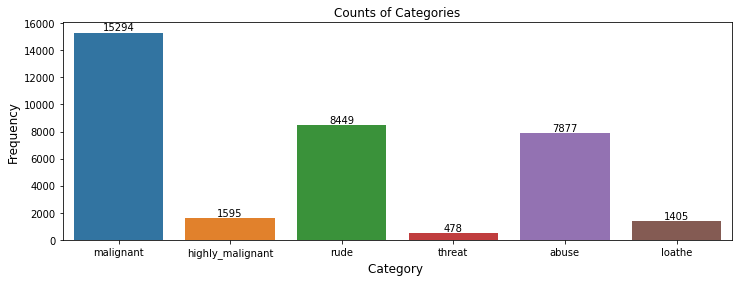

In [14]:
plt.figure(figsize=(12,4))
ax = sns.barplot(df_fig.index, df_fig['Negatives'].values,)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = df_fig['Negatives'].values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

most of the negative comments are malignant, followed by rude

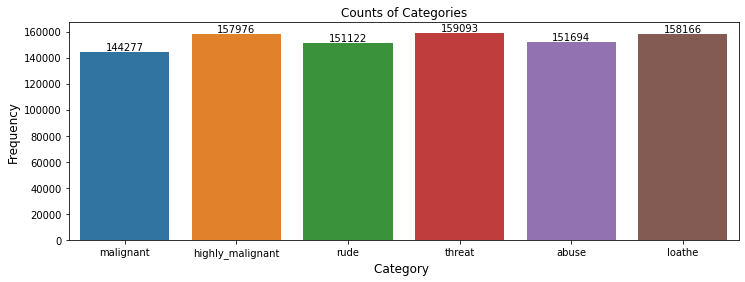

In [15]:
plt.figure(figsize=(12,4))
ax = sns.barplot(df_fig.index, df_fig['Positives'].values,)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = df_fig['Positives'].values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

most of the comments had threat the least followed by loathe

In [16]:
# to get status bar when running loop
from tqdm.notebook import tqdm

In [17]:
#  need to increase recursion limit as loop fails to run after a certain number of iteration
import sys
print(sys.getrecursionlimit())

3000


In [18]:

sys.setrecursionlimit(10000)

In [19]:
# cleaning the text data and storing it to corpus

corpus=[]
for i in tqdm(range(0,len(df))):
    review = re.sub('[^a-zA-Z]', ' ', df['comment_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

  0%|          | 0/159571 [00:00<?, ?it/s]

In [20]:
# storing the names of columns
categories=df.columns[2:]
categories

Index(['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'], dtype='object')

In [21]:
# df_x[categories].max(axis=1) gives 1 when any of the value in category column have value 1 else it takes value 0
# this is done to identify negative and positive comments 
df_x=df.copy()
df_x['Comment_label'] = df_x[categories].max(axis=1)
df_x['clean']=corpus
df_x

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_label,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,explan edit made usernam hardcor metallica fan...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,aww match background colour seemingli stuck th...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,hey man realli tri edit war guy constantli rem...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,make real suggest improv wonder section statis...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,sir hero chanc rememb page
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,second time ask view complet contradict covera...
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,asham horribl thing put talk page
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,spitzer umm there actual articl prostitut ring...
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,look like actual put speedi first version dele...


In [22]:
# for counting frequently occurence of Negative Comments Before and After Cleaning.
from collections import Counter
count1 = Counter(" ".join(df_x[df_x['Comment_label']==1]["comment_text"]).split()).most_common(10)
count2 = Counter(" ".join(df_x[df_x['Comment_label']==1]["clean"]).split()).most_common(10)
dataframe=pd.DataFrame()
dataframe['Most Frequent Words in Negative Comments Before Cleaing']=count1
dataframe['Most Frequent Words in Negative Comments After Cleaing']=count2
dataframe

,Most Frequent Words in Negative Comments Before Cleaing,Most Frequent Words in Negative Comments After Cleaing
0,"(you, 20355)","(fuck, 13573)"
1,"(the, 19018)","(suck, 4824)"
2,"(a, 18989)","(like, 4009)"
3,"(I, 17769)","(go, 3980)"
4,"(to, 15945)","(wikipedia, 3941)"
5,"(and, 14856)","(shit, 3725)"
6,"(is, 11308)","(nigger, 3435)"
7,"(of, 11199)","(ass, 3045)"
8,"(your, 7732)","(u, 2946)"
9,"(YOU, 7432)","(page, 2871)"


In [23]:
#for counting frequently occurence of Positive Comments Before and After Cleaning.
count1 = Counter(" ".join(df_x[df_x['Comment_label']==0]["comment_text"]).split()).most_common(10)
count2 = Counter(" ".join(df_x[df_x['Comment_label']==0]["clean"]).split()).most_common(10)
dataframe=pd.DataFrame()
dataframe['Most Frequent Words in Positive Comments Before Cleaning']=count1
dataframe['Most Frequent Words in Positive Comments After Cleaning']=count2
dataframe

,Most Frequent Words in Positive Comments Before Cleaning,Most Frequent Words in Positive Comments After Cleaning
0,"(the, 426973)","(articl, 72434)"
1,"(to, 272873)","(page, 54425)"
2,"(of, 208136)","(wikipedia, 44808)"
3,"(and, 192525)","(edit, 39081)"
4,"(a, 182832)","(talk, 38587)"
5,"(I, 166177)","(use, 34118)"
6,"(is, 153332)","(one, 28972)"
7,"(you, 136927)","(pleas, 28925)"
8,"(that, 133126)","(would, 28160)"
9,"(in, 124201)","(like, 26471)"


In [24]:
def Display_wordcloud(data,title):
    feedbackcloud = WordCloud(
        background_color = 'black',
        max_words = 1000,
        max_font_size = 40, 
        scale = 3,
        random_state = 25
    ).generate(str(data))

    fig = plt.figure(1, figsize = (15, 10),facecolor='g')
    plt.axis('off')
    plt.imshow(feedbackcloud)
    plt.title(f"{title} words")
    plt.show()

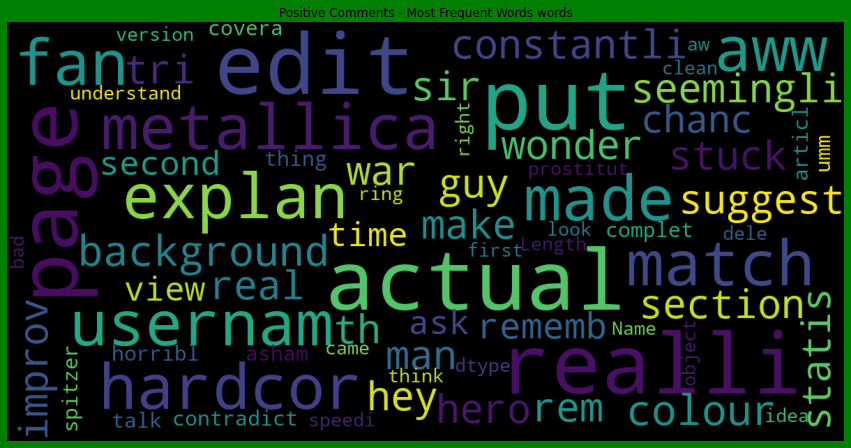

In [25]:
# Non-Negative Comments - Frequent words in training data
Display_wordcloud(df_x['clean'][df_x['Comment_label']==0],"Positive Comments - Most Frequent Words")

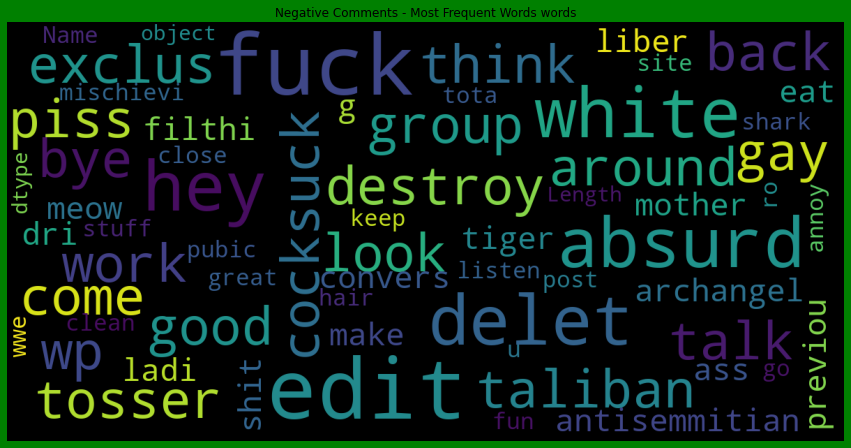

In [26]:
# Non-Negative Comments - Frequent words in training data
Display_wordcloud(df_x['clean'][df_x['Comment_label']==1],"Negative Comments - Most Frequent Words")

In [27]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(corpus).toarray()


In [28]:
x.shape

(159571, 2500)

In [29]:
y=df.iloc[:,2:].values


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)



In [31]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score,precision_score, multilabel_confusion_matrix, accuracy_score,jaccard_score, recall_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier

In [32]:
#lets define different algorithms
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
lgb = LGBMClassifier()
sgd = SGDClassifier()


In [33]:
#function for printing score and appending values
def print_score(y_pred,clf):
    print('classifier:',clf.__class__.__name__)
    print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
    js.append(round(jaccard_score(y_test,y_pred,average='micro'),2))
    print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
    acc.append(round(accuracy_score(y_test,y_pred),2))
    print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
    f1.append(round(f1_score(y_test,y_pred,average='micro'),2))
    print("Precision : ", precision_score(y_test,y_pred,average='micro'))
    pre.append(round(precision_score(y_test,y_pred,average='micro'),2))
    print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
    rec.append(round(recall_score(y_test,y_pred,average='micro'),2))
    print("Hamming loss: ", hamming_loss(y_test,y_pred))
    ham.append(round(hamming_loss(y_test,y_pred),2))
    print("Confusion matrix:\n ", multilabel_confusion_matrix(y_test,y_pred))
    print('========================================\n')    

In [34]:
#
js=[] #jaccard_score
acc=[] #accuracy_score
f1=[] #f1_score
pre=[] #precision_score
rec=[] #recall_score
ham=[] #hamming_loss

#models with evaluation using OneVsRestClassifier
for classifier in [svc,lr,mnb,sgd,lgb]:
   clf = OneVsRestClassifier(classifier)
   clf.fit(x_train,y_train)
   y_pred = clf.predict(x_test)
   print_score(y_pred, classifier)

classifier: LinearSVC
Jaccard score: 0.47569314932239215
Accuracy score: 0.9095096349678834
f1_score: 0.644704692897464
Precision :  0.8041193778898696
Recall: 0.5380396568696386
Hamming loss:  0.022022037704318764
Confusion matrix:
  [[[28501   313]
  [ 1205  1896]]

 [[31523    63]
  [  278    51]]

 [[30027   190]
  [  587  1111]]

 [[31763    61]
  [   72    19]]

 [[30081   240]
  [  890   704]]

 [[31552    65]
  [  253    45]]]

classifier: LogisticRegression
Jaccard score: 0.4788785516721147
Accuracy score: 0.910637631207896
f1_score: 0.6476239054662926
Precision :  0.8187876182287188
Recall: 0.5356489945155393
Hamming loss:  0.02164603895764792
Confusion matrix:
  [[[28494   320]
  [ 1161  1940]]

 [[31532    54]
  [  271    58]]

 [[30044   173]
  [  601  1097]]

 [[31796    28]
  [   82     9]]

 [[30100   221]
  [  916   678]]

 [[31570    47]
  [  271    27]]]

classifier: MultinomialNB
Jaccard score: 0.4744119059049448
Accuracy score: 0.89609901300329
f1_score: 0.64352696

In [35]:
aa=['svc','lr','mnb','sgd','lgb']
kk=pd.DataFrame({'accuracy':acc,'f1_score': f1,'precision':pre,'recall':rec,'hamming_loss':ham,'jaccard_score':js},index=aa)
kk.sort_values(by=['accuracy','f1_score', 'precision'],ascending=False)

,accuracy,f1_score,precision,recall,hamming_loss,jaccard_score
lgb,0.92,0.70,0.81,0.62,0.02,0.54
lr,0.91,0.65,0.82,0.54,0.02,0.48
sgd,0.91,0.64,0.81,0.52,0.02,0.47
svc,0.91,0.64,0.80,0.54,0.02,0.48
mnb,0.90,0.64,0.60,0.69,0.03,0.47


**lgb** is the best model
1. highest accuracy, precision, recall, jaccard score
2. least hamming_loss


In [36]:
model = OneVsRestClassifier(LGBMClassifier())
model.fit(x_train,y_train)

OneVsRestClassifier(estimator=LGBMClassifier())

In [37]:
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [38]:
cores=[]
for i in tqdm(range(0,len(df_test))):
    review = re.sub('[^a-zA-Z]', ' ', df_test['comment_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    cores.append(review)
    

  0%|          | 0/153164 [00:00<?, ?it/s]

In [39]:
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(cores).toarray()

In [40]:
predictions = model.predict(x)
predictions

array([[1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [41]:
pred=pd.DataFrame(predictions, columns = ['malignant','highly_malignant','rude','threat','abuse','loathe'])
pred

,malignant,highly_malignant,rude,threat,abuse,loathe
0,1,0,1,0,1,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
153159,1,0,0,0,0,0
153160,0,0,1,0,0,0
153161,1,0,0,0,0,0
153162,1,0,1,0,1,0


In [42]:
x_test = pd.concat([df_test,pred], axis=1)
x_test

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,1,0,1,0,1,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0,0,0,0,0,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0,0,0,0,0,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0,0,0,0,0,0
4,00017695ad8997eb,I don't anonymously edit articles at all.,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",1,0,0,0,0,0
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,0,0,1,0,0,0
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",1,0,0,0,0,0
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",1,0,1,0,1,0
